In [1]:
%pip install missingno

%pip install xgboost

%pip install tqdm

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import missingno as msno
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy.stats as stats


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the CSV file into a DataFrame
file_path = 'airbnb_data_v2.csv'  
data = pd.read_csv(file_path)

# Define the columns to keep. These are directly related to your research question.
columns_to_keep = ['listing_age_years', 'availability_90', 'instant_bookable', 'listing_age_years', 'recency_years','review_scores_variance',
    'City_encoded',  
    'room_type_encoded', 
    'accommodates',  
    'beds',  
    'price',     
    'reviews_per_month', 
    'bedrooms', 
    'baths',
    'average_review']

# Drop all columns that are not in the 'columns_to_keep' list
data_featured = data[columns_to_keep]

# Check the first few rows to ensure we have the correct columns
print(data_featured.head())

# Save the cleaned dataset if necessary
data_featured.to_csv('airbnb_data_cleaned.csv', index=False)



   listing_age_years  availability_90  instant_bookable  listing_age_years  \
0           2.245038                1                 1           2.245038   
1           1.891855                7                 1           1.891855   
2           0.624230               89                 0           0.624230   
3           1.982204               60                 1           1.982204   
4           0.553046               52                 0           0.553046   

   recency_years  review_scores_variance  City_encoded  room_type_encoded  \
0       0.547570                0.041095             4                  2   
1       0.484600                0.008967             4                  2   
2       0.451745                0.006881             4                  2   
3       0.224504                0.005314             4                  2   
4       0.208077                0.008095             4                  2   

   accommodates  beds  price  reviews_per_month  bedrooms  baths  \


In [3]:
total_missing_values = data[columns_to_keep].isnull().sum().sum()

print(f"Total missing values in the specified columns: {total_missing_values}")

data_featured = data_featured.dropna()


Total missing values in the specified columns: 0


[2 1 3 0]


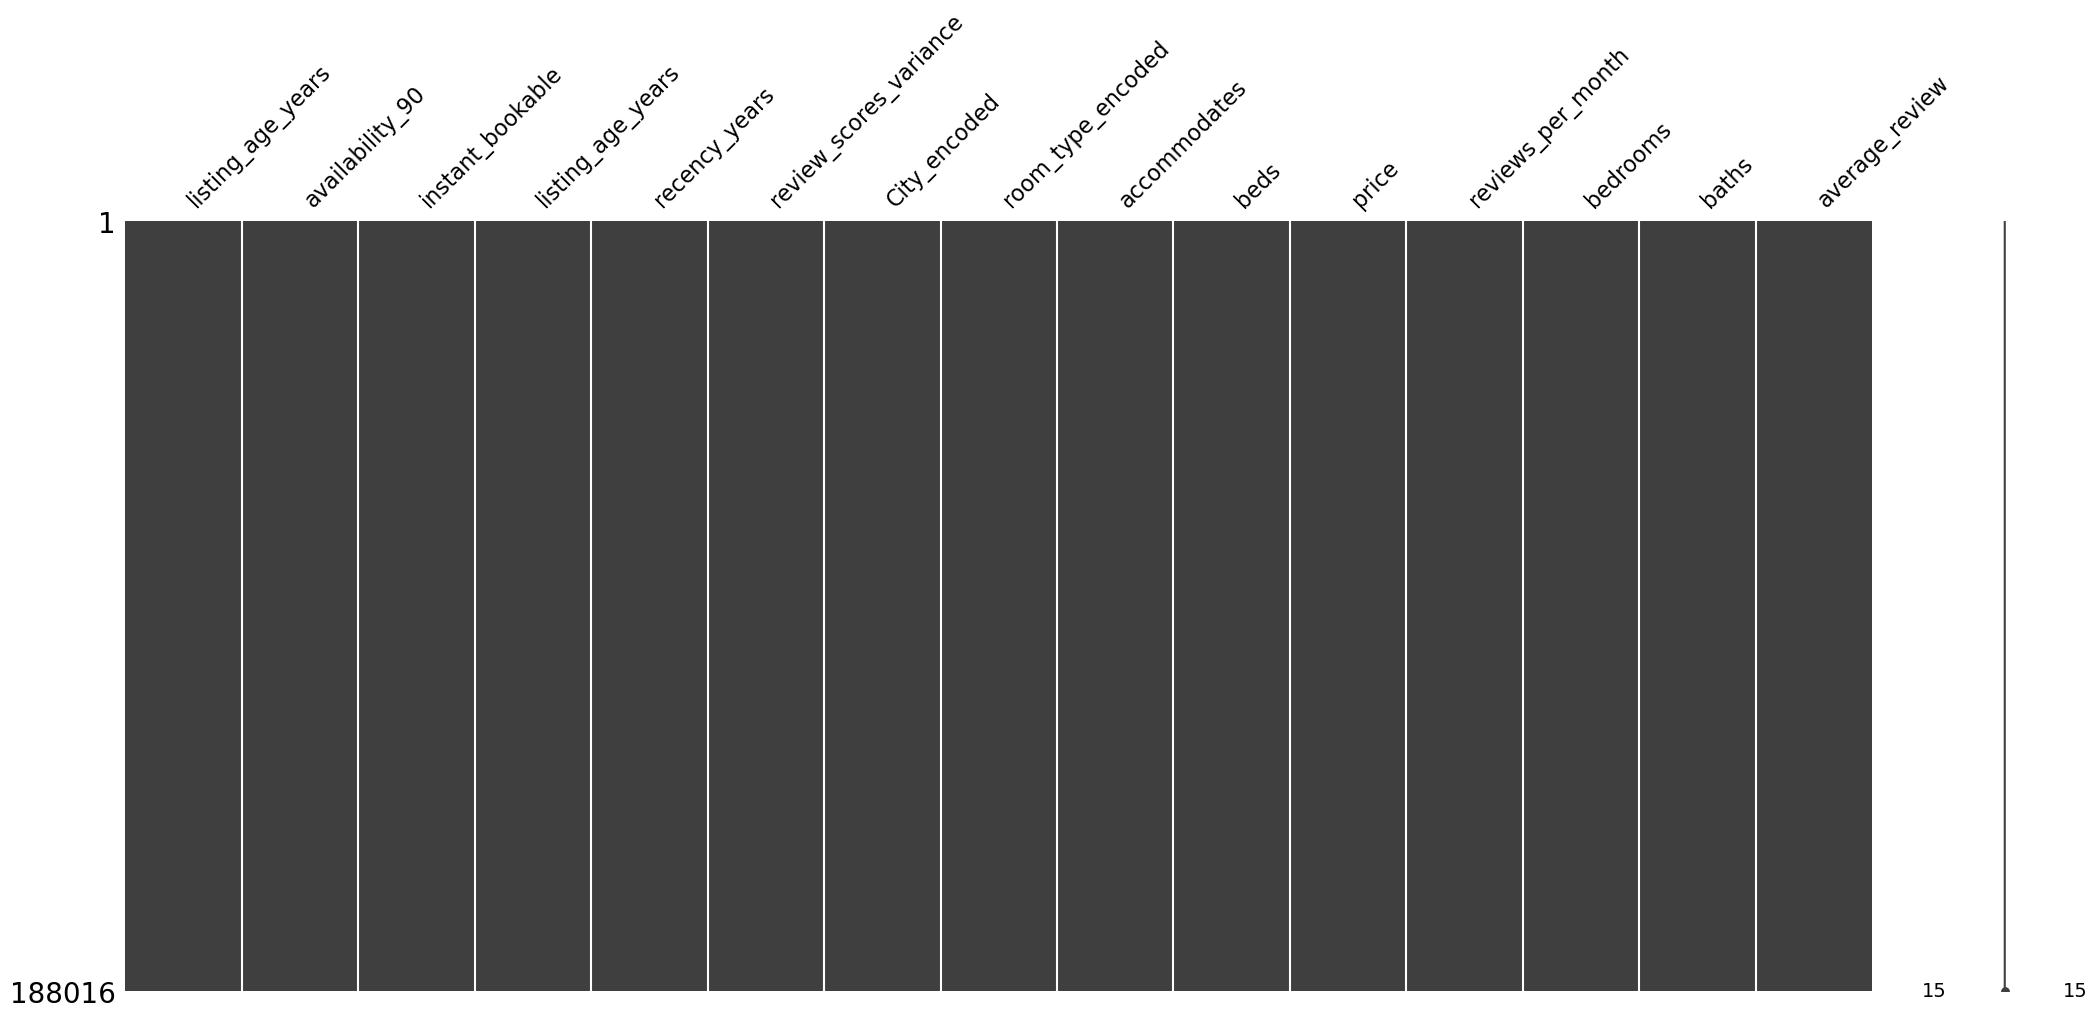

In [4]:
import pandas as pd


# Load the cleaned dataset
data_featured = data_featured.dropna()
msno.matrix(data_featured)

# Compute the unique property types
unique_room_types = data_featured['room_type_encoded'].unique()

# Print the unique property types
print(unique_room_types)


In [5]:
import pandas as pd

# Load the cleaned dataset
data_cleaned = data_featured

# Print the data types of all columns
print(data_cleaned.dtypes)

# Basic information about the dataset
basic_info = data_cleaned.info()

# Identifying missing values
missing_values_count = data_cleaned.isnull().sum()
missing_values_percentage = (data_cleaned.isnull().sum() / len(data_cleaned)) * 100

# Compile the missing data analysis into a DataFrame for better visualization
missing_data_analysis = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percentage
})

# Optional analysis on patterns of missing data
# This could involve checking if missingness in certain columns correlates with specific conditions

# Output the analysis results
print(missing_data_analysis)



listing_age_years         float64
availability_90             int64
instant_bookable            int64
listing_age_years         float64
recency_years             float64
review_scores_variance    float64
City_encoded                int64
room_type_encoded           int64
accommodates                int64
beds                      float64
price                     float64
reviews_per_month         float64
bedrooms                  float64
baths                       int64
average_review            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188016 entries, 0 to 188015
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   listing_age_years       188016 non-null  float64
 1   availability_90         188016 non-null  int64  
 2   instant_bookable        188016 non-null  int64  
 3   listing_age_years       188016 non-null  float64
 4   recency_years           188016 non-n

Count of Listings by Room Type:
room_type_encoded
Entire home/apt    150073
Private room        35679
Hotel room           1654
Shared room           610
Name: count, dtype: int64


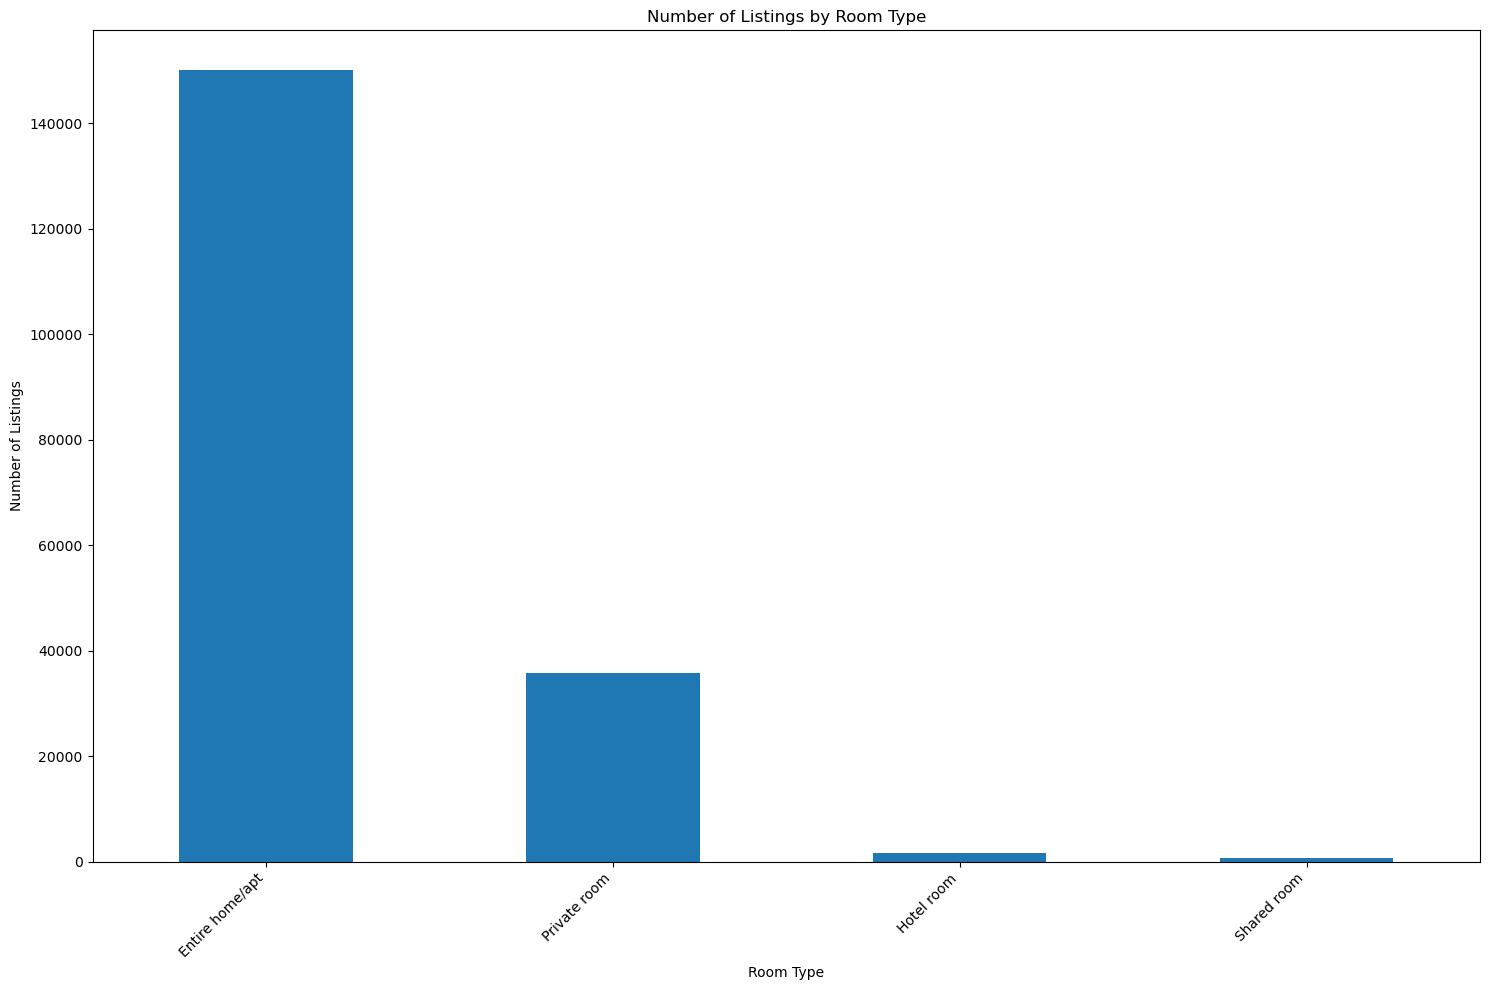

In [6]:
import matplotlib.pyplot as plt

# Define a mapping from encoded numbers to room types
room_type_labels = {
    0: 'Shared room',
    1: 'Private room',
    2: 'Entire home/apt',
    3: 'Hotel room'
}

# Group the data by 'room_type_encoded' and count the number of listings for each type
room_type_counts = data_cleaned['room_type_encoded'].value_counts().rename(index=room_type_labels)
print("Count of Listings by Room Type:")
print(room_type_counts)

# Plotting
plt.figure(figsize=(15, 10))  # Adjust the figure size as necessary
room_type_counts.plot(kind='bar')  # Use 'barh' for a horizontal bar plot if preferred
plt.title('Number of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Display the plot
plt.show()


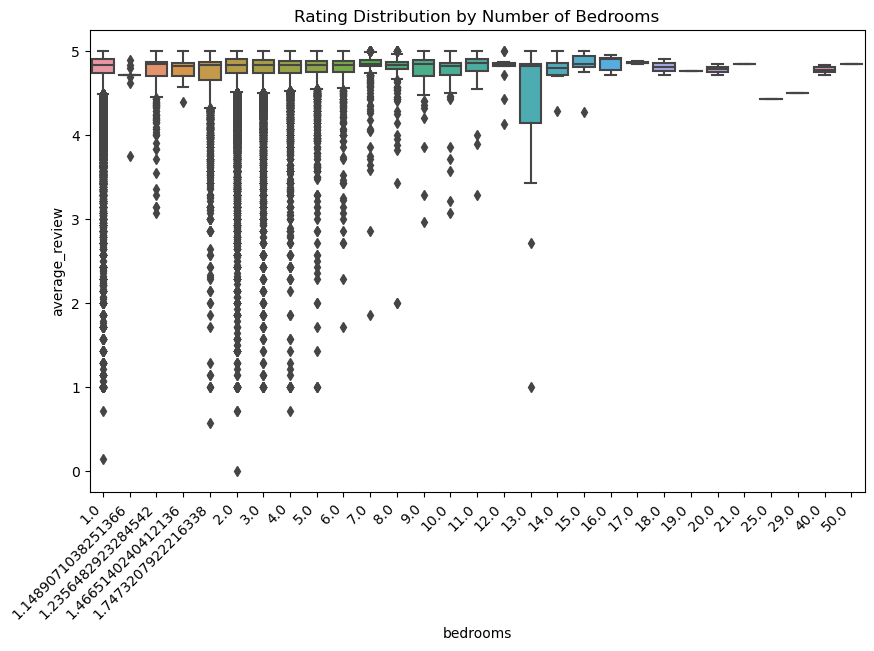

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='average_review', data=data_featured)
plt.xticks(rotation=45, ha='right')  # Improve readability of property_type labels
plt.title('Rating Distribution by Number of Bedrooms')
plt.show()

# Note: This script may require modifications based on your dataset specifics, like the currency format.


In [8]:
print(data_featured.head())

data=data_featured

   listing_age_years  availability_90  instant_bookable  listing_age_years  \
0           2.245038                1                 1           2.245038   
1           1.891855                7                 1           1.891855   
2           0.624230               89                 0           0.624230   
3           1.982204               60                 1           1.982204   
4           0.553046               52                 0           0.553046   

   recency_years  review_scores_variance  City_encoded  room_type_encoded  \
0       0.547570                0.041095             4                  2   
1       0.484600                0.008967             4                  2   
2       0.451745                0.006881             4                  2   
3       0.224504                0.005314             4                  2   
4       0.208077                0.008095             4                  2   

   accommodates  beds  price  reviews_per_month  bedrooms  baths  \


## Outlier Detection

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of columns to normalize - removing 'average_review' from here
# because we're going to log-transform it separately
columns_to_normalize = ['listing_age_years', 'availability_90', 'instant_bookable', 'listing_age_years',
                        'review_scores_variance', 'accommodates', 'price', 'reviews_per_month']

# Apply Min-Max normalization to the selected columns
data_featured[columns_to_normalize] = scaler.fit_transform(data_featured[columns_to_normalize])

def detect_outliers_by_room_and_bedrooms(df, k=1):
    # Prepare DataFrame to store all clean data
    cleaned_data_frames = []
    
    # Iterate over each room type and number of bedrooms
    for (room_type, bedrooms), group in df.groupby(['room_type_encoded', 'bedrooms']):
        outliers_df = pd.DataFrame(index=group.index, columns=group.columns)
        
        # Calculate outliers for each numeric column in the group
        for col in group.select_dtypes(include=[np.number]).columns:
            if col in ['room_type_encoded', 'bedrooms']:  # Skip room type and bedroom columns for outlier detection
                continue
            Q1 = group[col].quantile(0.25)
            Q3 = group[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((group[col] < (Q1 - k * IQR)) | (group[col] > (Q3 + k * IQR)))
            outliers_df[col] = outliers
        
        # Append the clean data (without outliers) of the current room type and bedrooms to the list
        cleaned_data_frames.append(group[~outliers_df.any(axis=1)])
    
    # Concatenate all cleaned data frames back into a single DataFrame
    cleaned_data = pd.concat(cleaned_data_frames)

    return cleaned_data

# Assuming data is your DataFrame
# data = pd.read_csv('path_to_your_data.csv')

# Remove outliers by room type and number of bedrooms
cleaned_data = detect_outliers_by_room_and_bedrooms(data_featured)
clean_data = cleaned_data

# Optionally, verify the results
print(f"Original data rows: {data.shape[0]}")
print(f"Cleaned data rows: {cleaned_data.shape[0]}")
print(f"Rows removed: {data.shape[0] - cleaned_data.shape[0]}")


Original data rows: 188016
Cleaned data rows: 84837
Rows removed: 103179


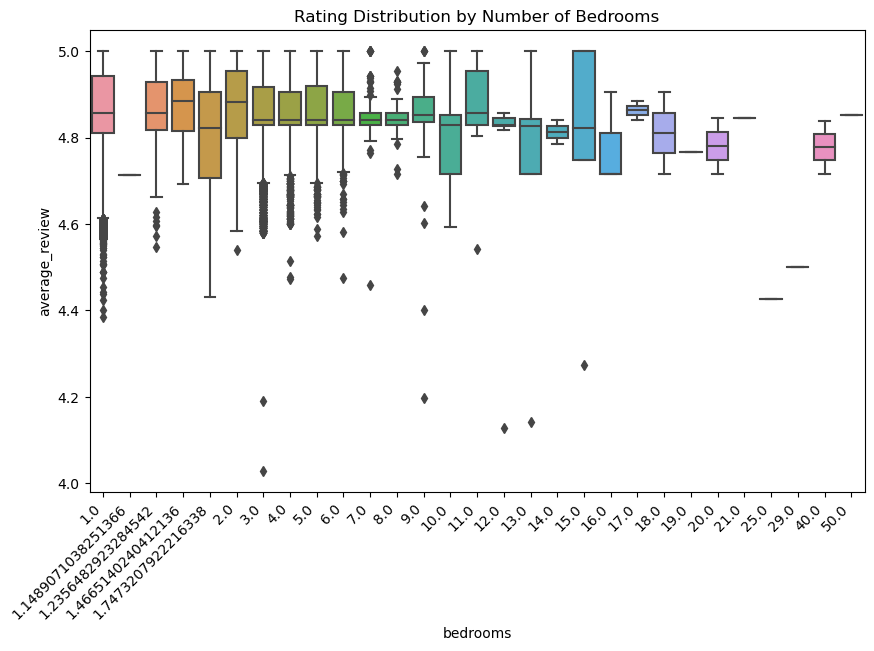

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Analysis on price outliers in relation with property_type
# For simplicity, we'll use boxplots to visualize price distribution for each property type

plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='average_review', data=clean_data)
plt.xticks(rotation=45, ha='right')  # Improve readability of property_type labels
plt.title('Rating Distribution by Number of Bedrooms')
plt.show()

# Note: This script may require modifications based on your dataset specifics, like the currency format.


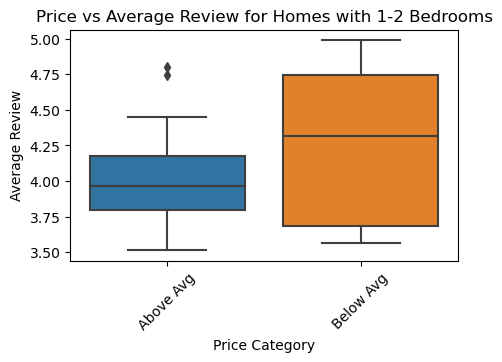

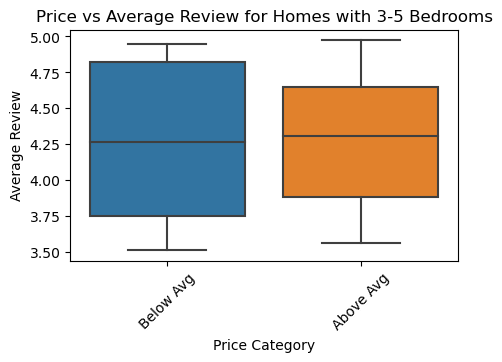

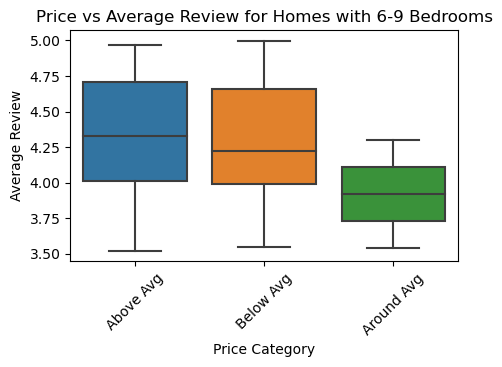

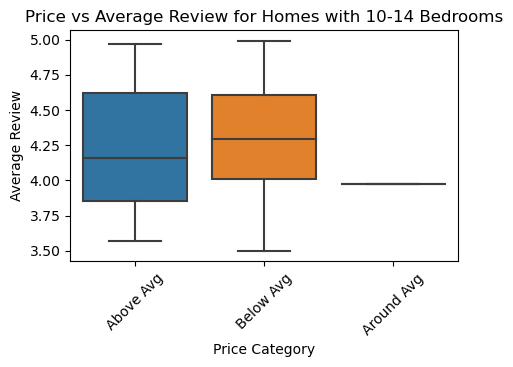

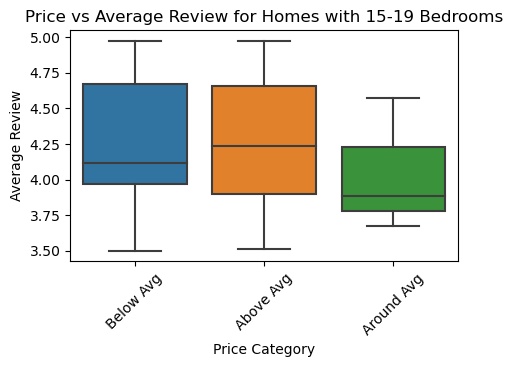

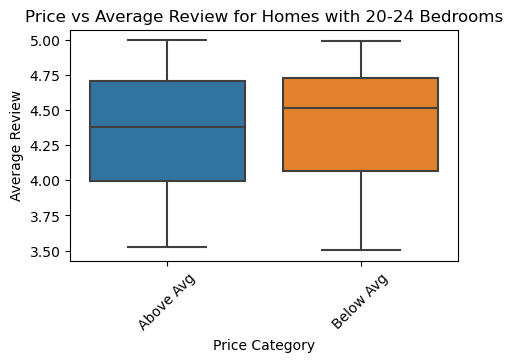

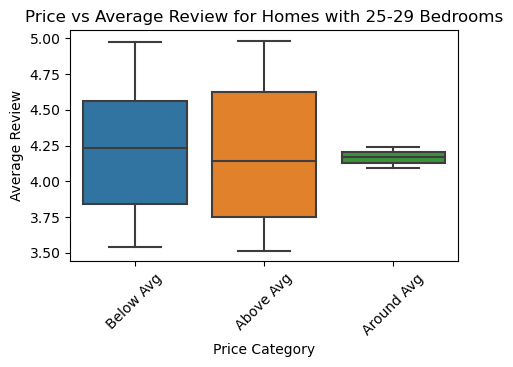

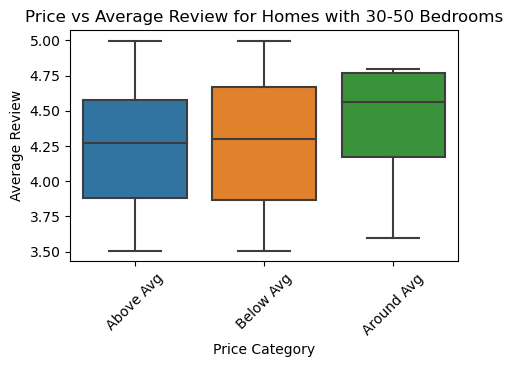

/var/folders/53/kssq81zs06d17_l658v4lbnm0000gn/T/ipykernel_31265/2876044549.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_featured, x='bedrooms', y='average_review', estimator='mean', ci=None)


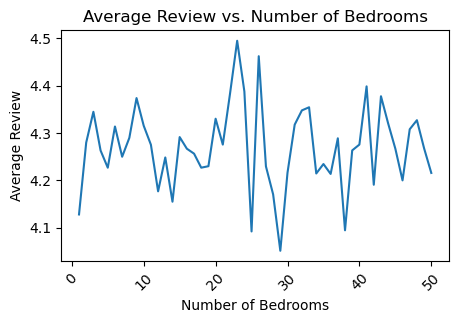

In [11]:
# Complete Python script for the task

data_updated=clean_data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation for demonstration
# Assuming 'data_featured' is the DataFrame that contains our data
# Including only essential columns for this example: 'bedrooms', 'price', 'average_review'
np.random.seed(0)
data_featured = pd.DataFrame({
    'bedrooms': np.random.choice(range(1, 51), 1000),
    'price': np.random.randint(50, 2000, 1000),
    'average_review': np.random.uniform(3.5, 5.0, 1000)
})

# Function to assign price bins based on the average price -/+ 10
def assign_price_bins(group):
    avg_price = group['price'].mean()
    # Binning criteria
    conditions = [
        group['price'] < (avg_price - 10),
        (group['price'] >= (avg_price - 10)) & (group['price'] <= (avg_price + 10)),
        group['price'] > (avg_price + 10)
    ]
    choices = ['Below Avg', 'Around Avg', 'Above Avg']
    group['price_bin'] = np.select(conditions, choices, default='Unknown')
    return group

# Define custom bedroom bins
custom_bedroom_bins = [0, 2, 5, 9, 14, 19, 24, 29, 50]  # Bin edges
custom_bedroom_labels = ['1-2', '3-5', '6-9', '10-14', '15-19', '20-24', '25-29', '30-50']  # Bin labels

# Apply the custom binning to the dataframe
data_featured['custom_bedroom_bin'] = pd.cut(data_featured['bedrooms'], bins=custom_bedroom_bins, labels=custom_bedroom_labels, right=True)

# Apply price bins within each custom bedroom bin
data_featured = data_featured.groupby('custom_bedroom_bin').apply(assign_price_bins)

# Plotting for each custom bedroom bin
for label in custom_bedroom_labels:
    bin_data = data_featured[data_featured['custom_bedroom_bin'] == label]
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='price_bin', y='average_review', data=bin_data)
    plt.title(f'Price vs Average Review for Homes with {label} Bedrooms')
    plt.xlabel('Price Category')
    plt.ylabel('Average Review')
    plt.xticks(rotation=45)
    plt.show()

# Re-plotting the overall trend of average review vs. number of bedrooms
plt.figure(figsize=(5, 3))
sns.lineplot(data=data_featured, x='bedrooms', y='average_review', estimator='mean', ci=None)
plt.title('Average Review vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Review')
plt.xticks(rotation=45)
plt.show()


In [12]:
print(data_updated.head())

      listing_age_years  availability_90  instant_bookable  listing_age_years  \
558            0.138359         0.811111               1.0           0.138359   
630            0.266603         0.966667               0.0           0.266603   
1157           0.092557         0.222222               0.0           0.092557   
1164           0.049618         0.977778               0.0           0.049618   
1401           1.000000         0.366667               0.0           1.000000   

      recency_years  review_scores_variance  City_encoded  room_type_encoded  \
558        0.388775                0.001495             4                  0   
630        1.278576                0.010000             4                  0   
1157       0.799452                0.006000             4                  0   
1164       0.514716                0.007680             4                  0   
1401      12.780287                0.006735             4                  0   

      accommodates      beds    

In [13]:
#Data updated is the new data frame with everyhting we need

In [14]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

Compute the Average Price Per Bedroom

In [15]:
import pandas as pd

# I assume data_updated is your DataFrame that's already been loaded.

# Remove duplicated columns
data_updated = data_updated.loc[:, ~data_updated.columns.duplicated()]

# Convert the 'price' column to numeric by removing the dollar sign and converting to float
# This assumes that the 'price' column exists and the prices are formatted as strings with a dollar sign.
data_updated['price'] = data_updated['price'].replace('[\$,]', '', regex=True).astype(float)

# Now calculate the average price based on the number of bedrooms
# This assumes that 'bedrooms' is a column in your DataFrame.
data_updated['average_price_by_bedroom'] = data_updated.groupby('bedrooms')['price'].transform('mean')

# Adding an index column
data_updated.reset_index(inplace=True)
data_updated.rename(columns={'index': 'index_column'}, inplace=True)

# Save the cleaned and updated DataFrame to a CSV file
data_updated.to_csv('airbnb_data_cleaned2.csv', index=False)

# Assuming 'swap_columns' is a function defined elsewhere that swaps the columns.
swap_columns(data_updated, 'average_review', 'average_price_by_bedroom')

# Printing the row count and the first 10 rows to verify
row_count = len(data_updated)
print(row_count)
print(data_updated.head(10))


/var/folders/53/kssq81zs06d17_l658v4lbnm0000gn/T/ipykernel_31265/2965035248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_updated['price'] = data_updated['price'].replace('[\$,]', '', regex=True).astype(float)


84837
   index_column  listing_age_years  availability_90  instant_bookable  \
0           558           0.138359         0.811111               1.0   
1           630           0.266603         0.966667               0.0   
2          1157           0.092557         0.222222               0.0   
3          1164           0.049618         0.977778               0.0   
4          1401           1.000000         0.366667               0.0   
5          1993           1.000000         0.988889               0.0   
6          2557           1.000000         0.755556               0.0   
7          2991           1.000000         0.066667               0.0   
8          3507           0.513550         0.044444               0.0   
9          3746           0.401718         0.966667               0.0   

   recency_years  review_scores_variance  City_encoded  room_type_encoded  \
0       0.388775                0.001495             4                  0   
1       1.278576                0.01

Binning the data based on the number of postings active in the region

In [16]:

import pandas as pd

# Sample code to load your data_updated DataFrame
# data_updated = pd.read_csv('your_data.csv')
# Count the number of listings by city
city_listing_counts = data_updated['City_encoded'].value_counts()
print(city_listing_counts)
city_counts = city_listing_counts.to_dict()

# One-hot encode the 'room_type_encoded' column
room_type_dummies = pd.get_dummies(data_updated['room_type_encoded'], prefix='room_type')
data_updated = pd.concat([data_updated, room_type_dummies], axis=1)
data_updated.drop('room_type_encoded', axis=1, inplace=True)

# One-hot encode the 'City_encoded' column
city_dummies = pd.get_dummies(data_updated['City_encoded'], prefix='City')
data_updated = pd.concat([data_updated, city_dummies], axis=1)
data_updated.drop('City_encoded', axis=1, inplace=True)

# Display the DataFrame to verify the results
print(data_updated.head())




City_encoded
0    27459
3    19679
6    11300
5     7938
2     4606
7     4345
9     3199
8     2886
1     1993
4     1432
Name: count, dtype: int64
   index_column  listing_age_years  availability_90  instant_bookable  \
0           558           0.138359         0.811111               1.0   
1           630           0.266603         0.966667               0.0   
2          1157           0.092557         0.222222               0.0   
3          1164           0.049618         0.977778               0.0   
4          1401           1.000000         0.366667               0.0   

   recency_years  review_scores_variance  accommodates      beds     price  \
0       0.388775                0.001495      0.066667  2.000000  0.000242   
1       1.278576                0.010000      0.000000  1.000000  0.000179   
2       0.799452                0.006000      0.066667  2.945983  0.000210   
3       0.514716                0.007680      0.000000  3.000000  0.000179   
4      12.780287      

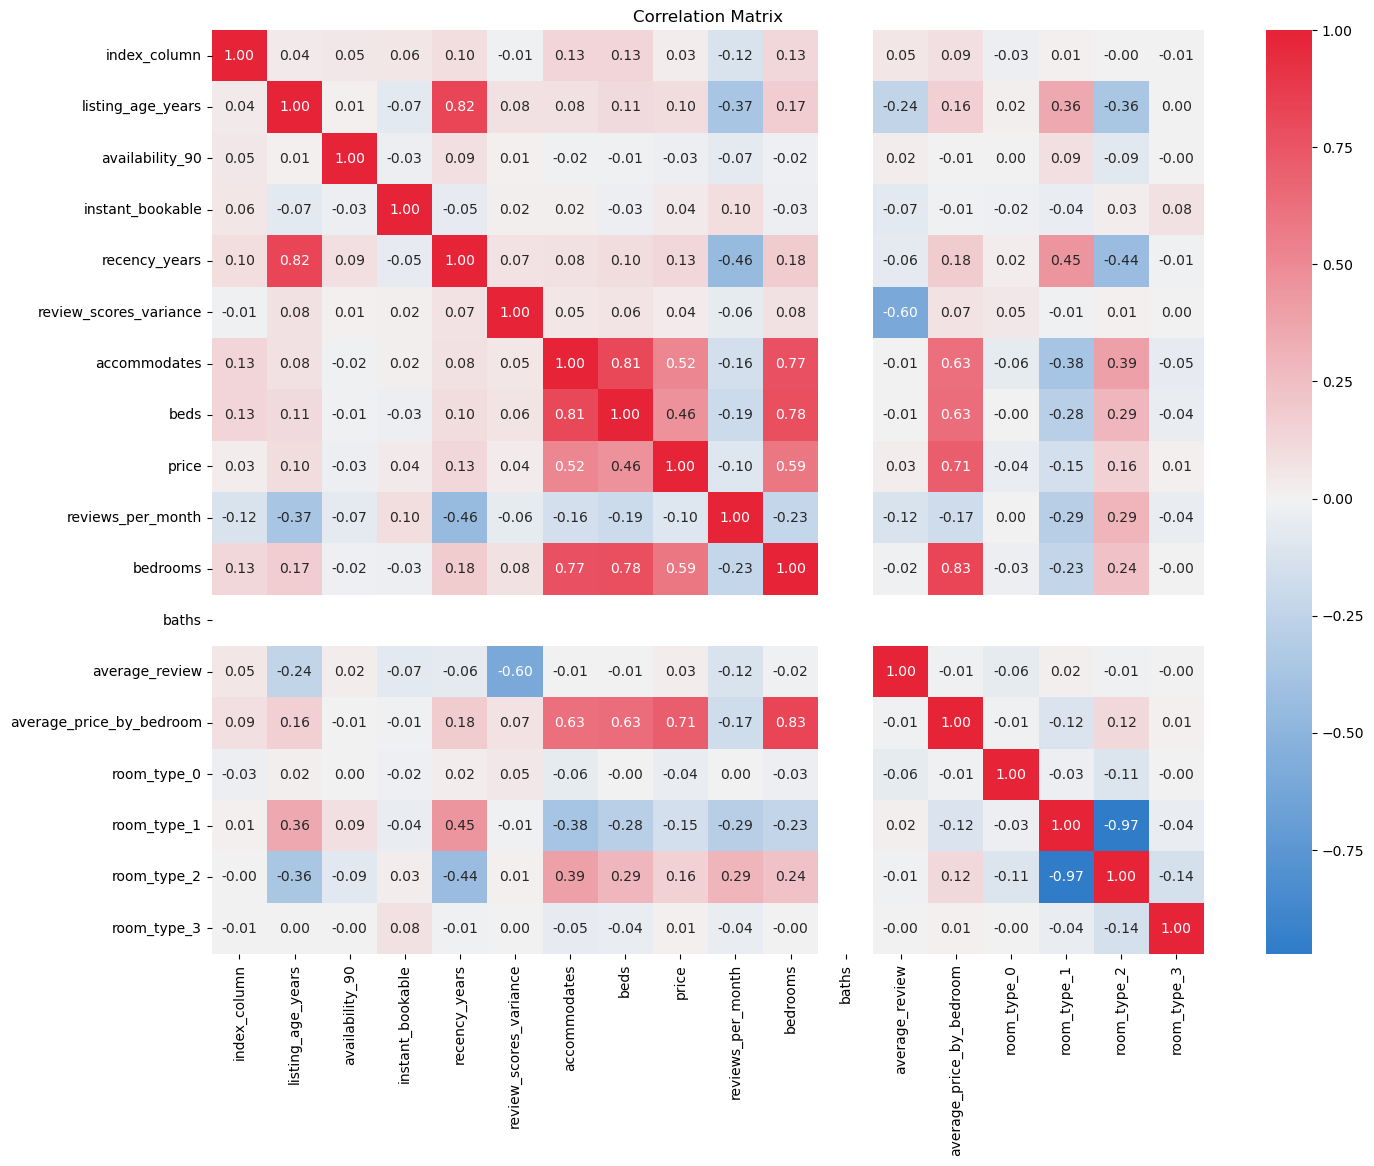

In [17]:
data_updated2=data_updated
# Convert boolean to int
data_updated2['room_type_0'] = data_updated2['room_type_0'].astype(int)
data_updated2['room_type_1'] = data_updated2['room_type_1'].astype(int)
data_updated2['room_type_2'] = data_updated2['room_type_2'].astype(int)
data_updated2['room_type_3'] = data_updated2['room_type_3'].astype(int)


variables_to_drop2 = ['City_0',  'City_1', 'City_2', 'City_3',  'City_4', 'City_5', 'City_6', 'City_7', 'City_8', 'City_9', ]

# Drop the variables from the DataFrame
data_updated2 = data_updated2.drop(columns=variables_to_drop2, errors='ignore')
# Creating the correlation matrix
correlation_matrix = data_updated2.corr()

# Define custom colormap
cmap = sns.diverging_palette(250, 10, s=90, l=50, as_cmap=True)

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, center=0)
plt.title('Correlation Matrix')
plt.show()


accommodates and beds 
accommodates and bedrooms
accommodates and baths
beds and bedrooms
beds and baths
bedrooms and baths
average_price_by_bedroom and price
average_price_by_bedroom and bedrooms
room_type_1 and room_type_2
room_type_1 and room_type_3

In [18]:
# List of variables to drop based on high collinearity
variables_to_drop = ['index_column','listing_age_years', 'beds', 'baths', 'bedrooms', 'review_scores_variance', 'reviews_per_month' ]

# Drop the variables from the DataFrame
data_updated = data_updated.drop(columns=variables_to_drop, errors='ignore')

# Now, data_updated_reduced has the reduced set of variables.

print(data_updated.head())


   availability_90  instant_bookable  recency_years  accommodates     price  \
0         0.811111               1.0       0.388775      0.066667  0.000242   
1         0.966667               0.0       1.278576      0.000000  0.000179   
2         0.222222               0.0       0.799452      0.066667  0.000210   
3         0.977778               0.0       0.514716      0.000000  0.000179   
4         0.366667               0.0      12.780287      0.066667  0.000672   

   average_review  average_price_by_bedroom  room_type_0  room_type_1  \
0        4.400000                  0.000818            1            0   
1        4.857143                  0.000818            1            0   
2        4.928571                  0.000818            1            0   
3        4.828571                  0.000818            1            0   
4        4.691429                  0.000818            1            0   

   room_type_2  ...  City_0  City_1  City_2  City_3  City_4  City_5  City_6  \
0      

In [19]:

columns_to_convert = data_updated.filter(like='room_type_encoded_0').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='room_type_encoded_1').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='room_type_encoded_2').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='room_type_encoded_3').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)



print(data_updated.columns)


columns_to_convert = data_updated.filter(like='City_0').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='City_1').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='City_2').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='City_3').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='City_4').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='City_5').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='City_6').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='City_7').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='City_8').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

columns_to_convert = data_updated.filter(like='City_9').columns
data_updated[columns_to_convert] = data_updated[columns_to_convert].astype(int)

Index(['availability_90', 'instant_bookable', 'recency_years', 'accommodates',
       'price', 'average_review', 'average_price_by_bedroom', 'room_type_0',
       'room_type_1', 'room_type_2', 'room_type_3', 'City_0', 'City_1',
       'City_2', 'City_3', 'City_4', 'City_5', 'City_6', 'City_7', 'City_8',
       'City_9'],
      dtype='object')


# Building a Model for Prediction


## Cluster Analysis

## Jers Regression Model

In [20]:

print(data_updated.columns)

Index(['availability_90', 'instant_bookable', 'recency_years', 'accommodates',
       'price', 'average_review', 'average_price_by_bedroom', 'room_type_0',
       'room_type_1', 'room_type_2', 'room_type_3', 'City_0', 'City_1',
       'City_2', 'City_3', 'City_4', 'City_5', 'City_6', 'City_7', 'City_8',
       'City_9'],
      dtype='object')


### Normalize the Data

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

# Assuming data_updated is already loaded into your workspace

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of columns to normalize - removing 'average_review' from here
# because we're going to log-transform it separately
columns_to_normalize = ['average_price_by_bedroom', 'recency_years', 'availability_90', 'instant_bookable', 'accommodates', 'price']

# Apply Min-Max normalization to the selected columns
data_updated[columns_to_normalize] = scaler.fit_transform(data_updated[columns_to_normalize])
# If the first column is an unnamed index column
data_updated.reset_index(drop=True, inplace=False)

# Impute missing values for 'average_review' after the transformation
data_updated['average_review'].fillna(data_updated['average_review'].mean(), inplace=True)
print(data_updated.head())

data_updated.to_csv('Normalized.csv', index=True)

   availability_90  instant_bookable  recency_years  accommodates     price  \
0         0.811111               1.0       0.016301      0.066667  0.002719   
1         0.966667               0.0       0.086938      0.000000  0.002009   
2         0.222222               0.0       0.048902      0.066667  0.002364   
3         0.977778               0.0       0.026299      0.000000  0.002009   
4         0.366667               0.0       1.000000      0.066667  0.007565   

   average_review  average_price_by_bedroom  room_type_0  room_type_1  \
0        4.400000                  0.007273            1            0   
1        4.857143                  0.007273            1            0   
2        4.928571                  0.007273            1            0   
3        4.828571                  0.007273            1            0   
4        4.691429                  0.007273            1            0   

   room_type_2  ...  City_0  City_1  City_2  City_3  City_4  City_5  City_6  \
0      

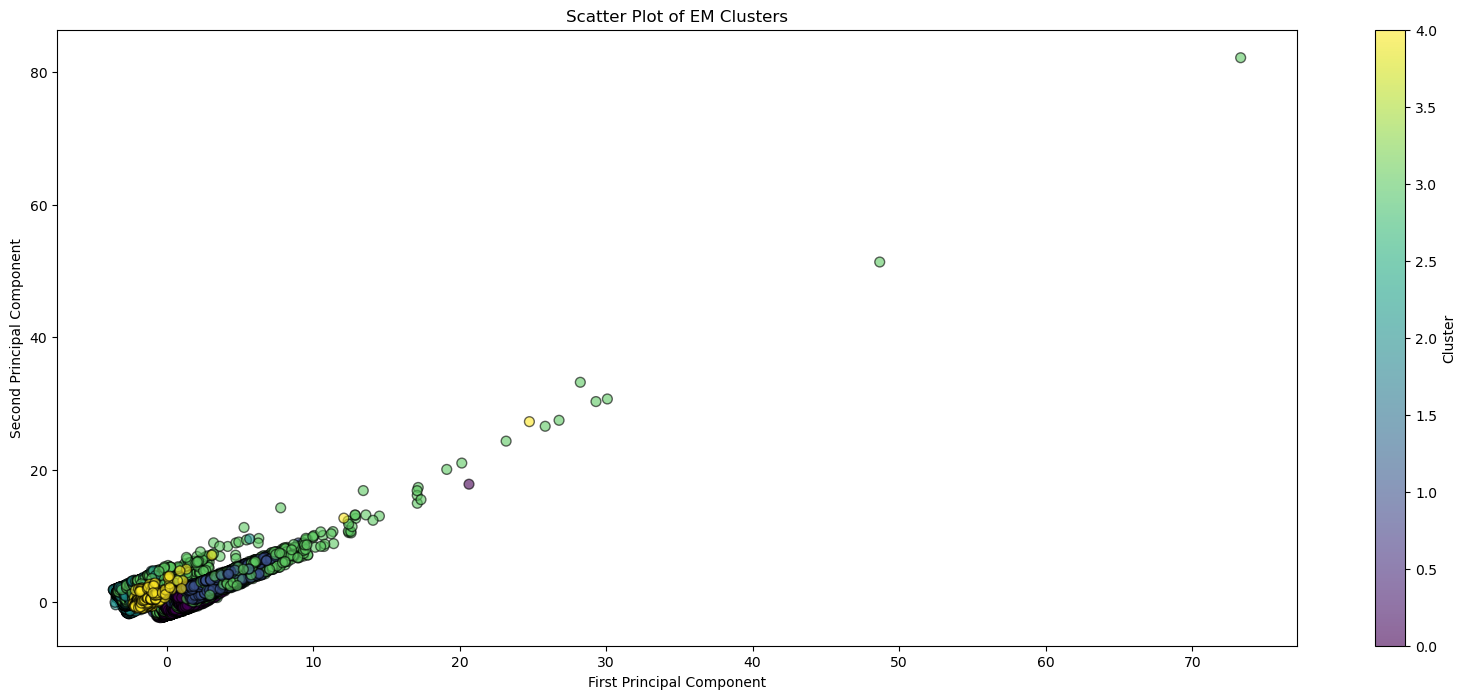

In [22]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_updated)

# Apply PCA to reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Initialize Gaussian Mixture Model with 5 clusters (for example)
gmm = GaussianMixture(n_components=5, random_state=42)

# Fit the model
gmm.fit(X_scaled)

# Predict the cluster for each data point
clusters = gmm.predict(X_scaled)

# Scatter plot of the first two PCA components, colored by cluster
plt.figure(figsize=(20, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.6)
plt.title('Scatter Plot of EM Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.show()


/Users/jeremygonsalves/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


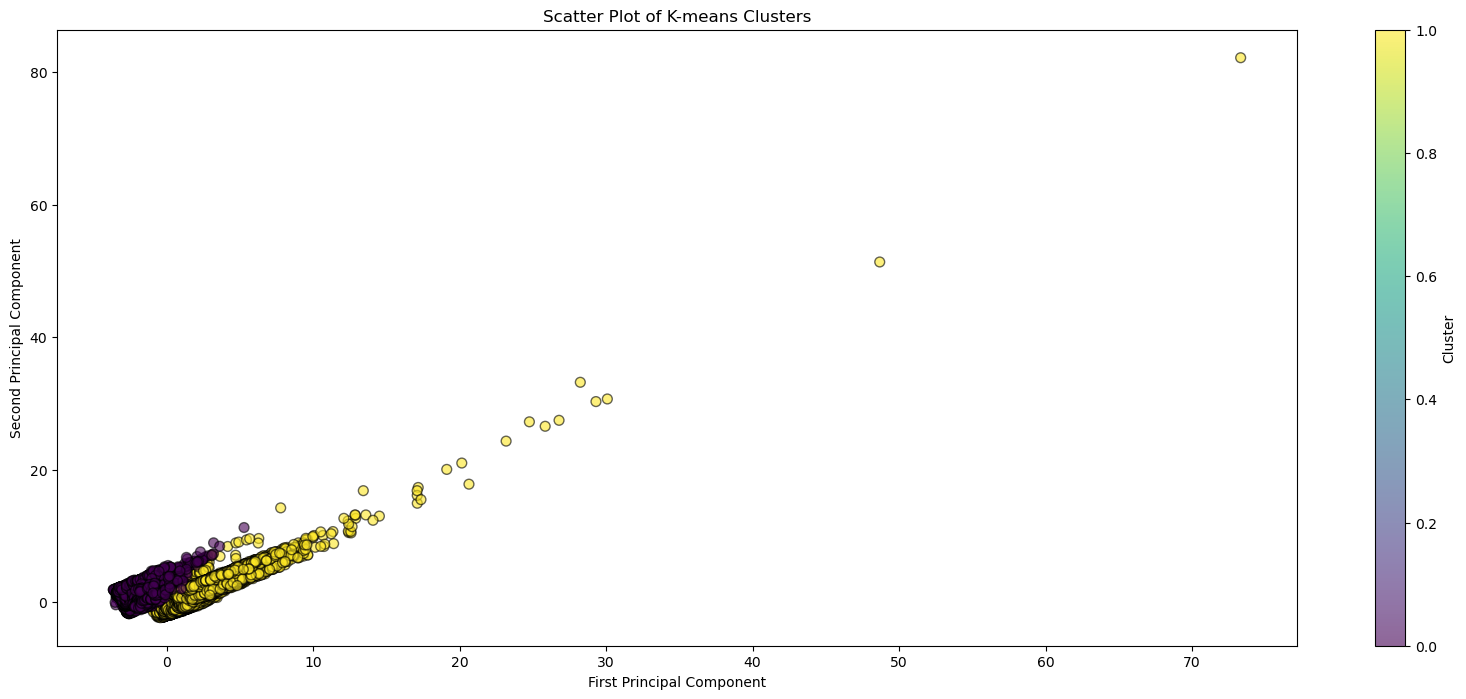

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_updated)

# Apply PCA to reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=42)  # Example: 5 clusters

# Fit the model and predict clusters
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Scatter plot of the first two PCA components, colored by cluster
plt.figure(figsize=(20, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.6)
plt.title('Scatter Plot of K-means Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.show()


## Linear Regression

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
# Assuming 'data_updated.csv' is your file, and it's in the current directory
data = data_updated

# Define features and target variable
X = data.drop(['average_review'], axis=1)  # drop the target column to isolate features
y = data['average_review']  # this is your target column

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate metrics to evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output results
print(f'R-squared score on the test set: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse:.4f}')


R-squared score on the test set: 0.0456
Root Mean Squared Error (RMSE) on the test set: 0.1016


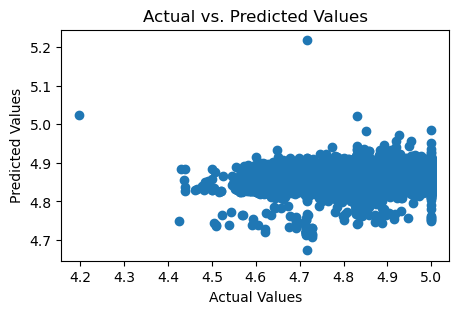

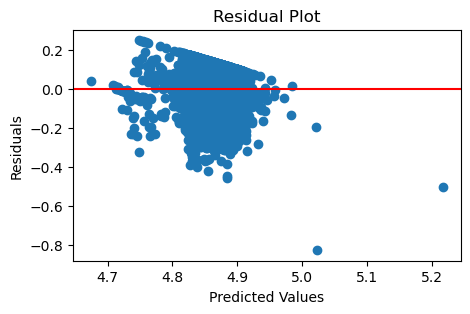

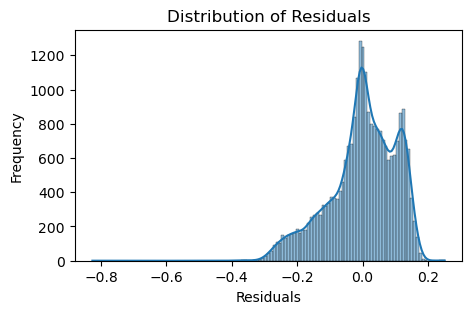

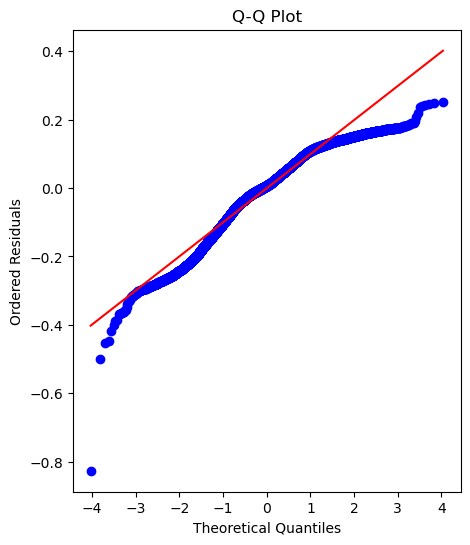

------------------------------------------------------------

Mean Squared Error (MSE): 0.010318684439022245
Root Mean Squared Error (RMSE): 0.10158092556687129
Mean Absolute Error (MAE): 0.07942227888722721
Linear Regression Accuracy on Test Data (within threshold 0.12): 74.69%


In [25]:
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.figure(figsize=(5, 3))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

plt.figure(figsize=(5, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Residuals")
plt.title("Q-Q Plot")
plt.show()


# Compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Compute mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)


print('-'*60)
print('')
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


# Define a threshold for accuracy
threshold = 0.12
tolerance=threshold 

# Calculate the absolute difference between true and predicted values
absolute_difference = np.abs(y_test - y_pred)

# Count the number of accurate predictions (where absolute difference is less than the threshold)
num_accurate_predictions = np.sum(absolute_difference <= threshold)

# Calculate accuracy percentage
accuracy_percentage = (num_accurate_predictions / len(y_test)) * 100

print("Linear Regression Accuracy on Test Data (within threshold {:.2f}): {:.2f}%".format(threshold, accuracy_percentage))



## Neural Networks

Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100 - loss: 38.9037, lr: 0.001000
Epoch 2/100 - loss: 3.1468, lr: 0.001000
Epoch 3/100 - loss: 1.2842, lr: 0.001000
Epoch 4/100 - loss: 0.5567, lr: 0.001000
Epoch 5/100 - loss: 0.3588, lr: 0.001000
Epoch 6/100 - loss: 0.3896, lr: 0.001000
Epoch 7/100 - loss: 0.4034, lr: 0.001000
Epoch 8/100 - loss: 0.4078, lr: 0.001000
Epoch 9/100 - loss: 0.4084, lr: 0.001000
Epoch 10/100 - loss: 0.4083, lr: 0.001000
Epoch 11/100 - loss: 0.4075, lr: 0.001000
Epoch 12/100 - loss: 0.3848, lr: 0.000950
Epoch 13/100 - loss: 0.3642, lr: 0.000903
Epoch 14/100 - loss: 0.3471, lr: 0.000857
Epoch 15/100 - loss: 0.0873, lr: 0.000163
Epoch 16/100 - loss: 0.0802, lr: 0.000155
Epoch 17/100 - loss: 0.0746, lr: 0.000147
Epoch 18/100 - loss: 0.0730, lr: 0.000140
Epoch 19/100 - loss: 0.0708, lr: 0.000133
Epoch 20/100 - loss: 0.0676, lr: 0.000126
Epoch 21/100 - loss: 0.0644, lr: 0.000120
Epoch 22/100 - loss: 0.0635, lr: 0.000114
Epoch 23/100 - loss: 0.0621, lr: 0.000108
Epoch 24/100 - loss: 0.0599, lr: 0.000103


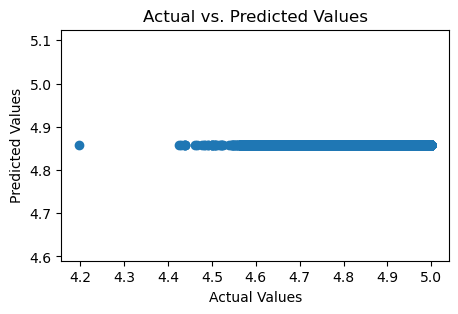

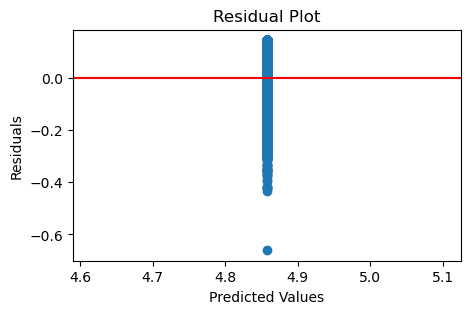

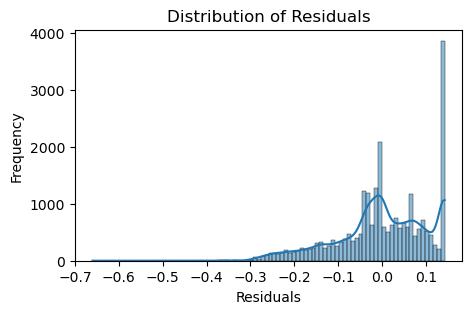

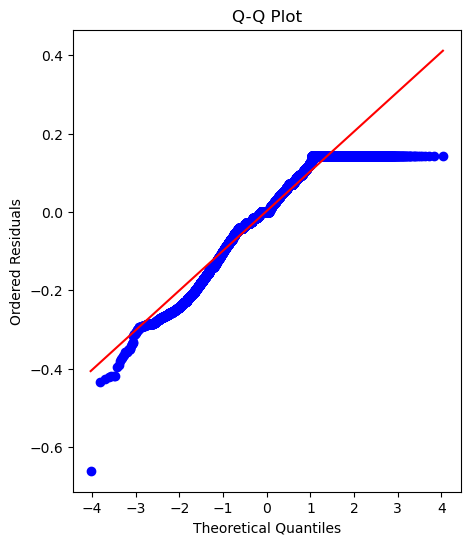

------------------------------------------------------------
Mean Squared Error (MSE): 0.0108
Root Mean Squared Error (RMSE): 0.1040
Mean Absolute Error (MAE): 0.0820
 Neural Network Accuracy within a 0.12 threshold: 70.14%


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K
from tensorflow.keras.activations import relu
from tensorflow.keras.initializers import HeNormal
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load and prepare data
# Assume data_updated is already loaded
X = data_updated.drop(['average_review'], axis=1)
y = data_updated['average_review']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Neural Network Model Setup with enhanced architecture and advanced features
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, kernel_initializer=HeNormal(), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(512, kernel_initializer=HeNormal(), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, kernel_initializer=HeNormal(), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1, activation='linear')
])

# Custom learning rate scheduler
def scheduler(epoch, lr):
    return lr * 0.95 if epoch > 10 else lr

# Compile the model with an adaptive learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

epochs=100  # Increased training duration
# Custom Callback for tqdm progress bar integration and learning rate scheduler
class TQDMCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        current_lr = K.get_value(self.model.optimizer.learning_rate)
        tqdm.write(f"Epoch {epoch + 1}/{epochs} - loss: {logs.get('loss'):.4f}, lr: {current_lr:.6f}")

# Setup and display progress bar manually
progress_bar = tqdm(total=100, desc="Training Progress")

# Callbacks for early stopping, learning rate reduction, and custom scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Model training with callbacks
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, verbose=0,
                    callbacks=[TQDMCallback(), early_stopping, reduce_lr, lr_scheduler])

# Update and close the progress bar based on training progress
progress_bar.n = 100
progress_bar.last_print_n = 100
progress_bar.refresh()
progress_bar.close()

# Use the trained model to make predictions
y_pred = model.predict(X_test).flatten()

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

threshold = 0.12

# Calculate the absolute difference between true and predicted values
absolute_difference = np.abs(y_test - y_pred)

# Count the number of accurate predictions (where absolute difference is less than the threshold)
num_accurate_predictions = np.sum(absolute_difference <= threshold)

# Calculate accuracy percentage
accuracy_percentage = (num_accurate_predictions / len(y_test)) * 100



# Plotting the results and residuals
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

plt.figure(figsize=(5, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Residuals")
plt.title("Q-Q Plot")
plt.show()


print('-'*60)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f" Neural Network Accuracy within a {threshold} threshold: {accuracy_percentage:.2f}%")



## XGBoost

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.18000000000000002, 'gamma': 0.5, 'colsample_bytree': 0.7}
Best RMSE score achieved with all features: 0.0997303849518547


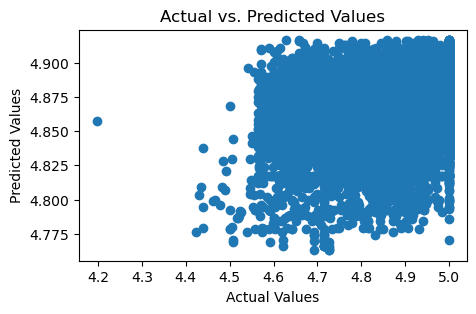

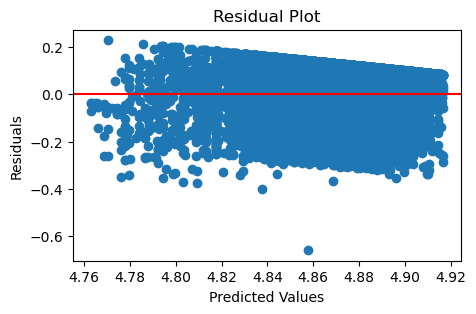

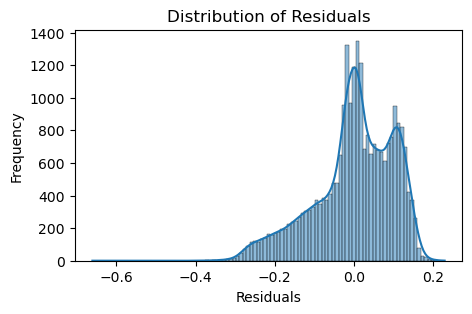

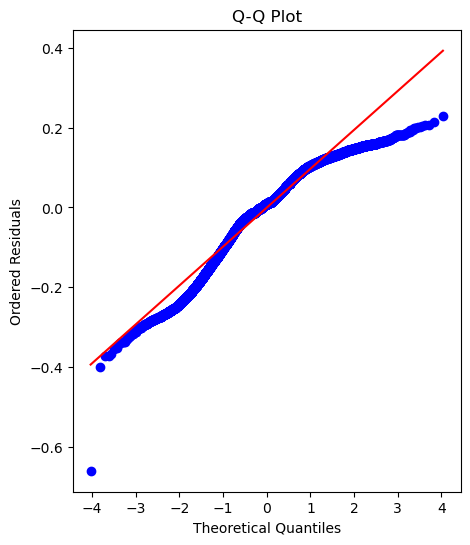

------------------------------------------------------------

Mean Squared Error (MSE): 0.009946149682645126
Root Mean Squared Error (RMSE): 0.0997303849518547
Mean Absolute Error (MAE): 0.07751579455411235
XGBoost Accuracy on Test Data (within threshold 0.12): 76.85%


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from tqdm.auto import tqdm

# Assuming data is loaded and prepared
# Define features and target variable
X = data_updated.drop(['average_review'], axis=1)
y = data_updated['average_review']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'colsample_bytree': np.linspace(0.5, 1, 6),
    'gamma': [0.5, 1, 1.5, 2, 5],
    'learning_rate': np.linspace(0.01, 0.2, 20),
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': np.linspace(0.6, 1, 5)
}

# Perform randomized search with 10-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_regressor,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',
    cv=10,  # Using 10-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Execute randomized search
random_search.fit(X_train, y_train)

# Use the best estimator from the randomized search to make predictions
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Compute RMSE for the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output the results
print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best RMSE score achieved with all features: {rmse}')


plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.figure(figsize=(5, 3))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

plt.figure(figsize=(5, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Residuals")
plt.title("Q-Q Plot")
plt.show()


# Compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Compute mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)


print('-'*60)
print('')
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


# Define a threshold for accuracy
threshold = 0.12
tolerance=threshold 

# Calculate the absolute difference between true and predicted values
absolute_difference = np.abs(y_test - y_pred)

# Count the number of accurate predictions (where absolute difference is less than the threshold)
num_accurate_predictions = np.sum(absolute_difference <= threshold)

# Calculate accuracy percentage
accuracy_percentage = (num_accurate_predictions / len(y_test)) * 100

print("XGBoost Accuracy on Test Data (within threshold {:.2f}): {:.2f}%".format(threshold, accuracy_percentage))


## SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from tqdm.auto import tqdm

# Assuming data is loaded and prepared
# Define features and target variable
X = data_updated.drop(['average_review'], axis=1)
y = data_updated['average_review']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# SVM Model Setup
model = SVR(kernel='rbf', C=2, epsilon=0.005)

# Setup and display progress bar manually
progress_bar = tqdm(total=30, desc="Training Progress")

# Model training
model.fit(X_train, y_train)

# Update and close the progress bar manually
progress_bar.n = 30
progress_bar.last_print_n = 30
progress_bar.refresh()
progress_bar.close()

# Use the trained model to make predictions
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output results
print(f'R-squared score on the test set: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse:.4f}')

plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.figure(figsize=(5, 3))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

plt.figure(figsize=(5, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Residuals")
plt.title("Q-Q Plot")
plt.show()


# Compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Compute mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)


print('-'*60)
print('')
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


# Define a threshold for accuracy
threshold = 0.12
tolerance=threshold 

# Calculate the absolute difference between true and predicted values
absolute_difference = np.abs(y_test - y_pred)

# Count the number of accurate predictions (where absolute difference is less than the threshold)
num_accurate_predictions = np.sum(absolute_difference <= threshold)

# Calculate accuracy percentage
accuracy_percentage = (num_accurate_predictions / len(y_test)) * 100

print("SVM Accuracy on Test Data (within threshold {:.2f}): {:.2f}%".format(threshold, accuracy_percentage))

Training Progress:   0%|          | 0/30 [00:00<?, ?it/s]